# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [23]:
import json
import pandas as pd

with open('../../data/News_Category_Dataset_v3.json', 'r') as f:
    json_data = f.read()
    
json_data2 = [json.loads(line) for line in json_data.split('\n') if line]
df = pd.DataFrame.from_records(json_data2)

In [24]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [25]:
top_10_categories = df['category'].value_counts().nlargest(10).index
print("Top 10 categories:", top_10_categories)
# Filtering data for top 10 categories
data = df[['category', 'short_description']][df['category'].isin(
top_10_categories)].reset_index(drop=True)
display(data['category'].value_counts())

Top 10 categories: Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

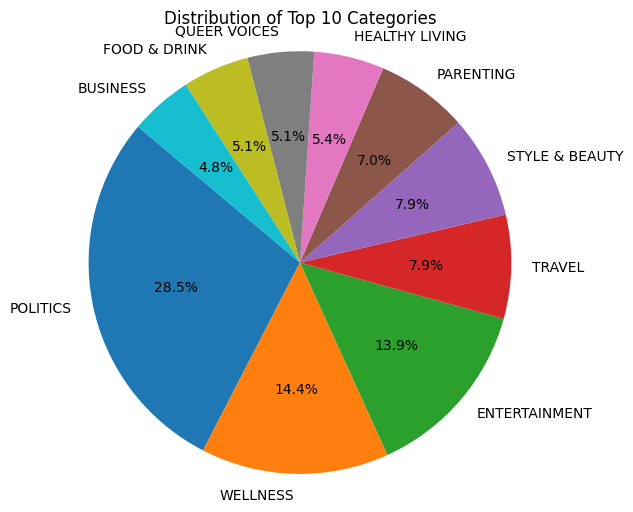

In [26]:
import matplotlib.pyplot as plt
# Counting occurrences of each category
category_counts = data['category'].value_counts()
# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Categories')
plt.axis('equal')
plt.show()

## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

In [27]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')

def preprocess_text(text):
    '''Preprocess text by making it lowercase, removing text in square brackets,removing links, removing punctuation, and removing words containing numbers.'''
    return re.sub('\[.*?\]|\w*\d\w*|https?://\S+|www\.\S+|<.*?>+|[%s]' % re.escape(string.punctuation), '', str(text).lower())

def eliminate_stopwords(text):
    '''Remove stopwords from the text'''
    stop_words = stopwords.words('english')
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def apply_stemming(sentence):
    stemmer = nltk.SnowballStemmer("english")
    return ' '.join(stemmer.stem(word) for word in sentence.split(' '))

def preprocess_and_clean(sentence):
    '''Preprocess and clean the text'''
    cleaned_text = preprocess_text(sentence)
    stop_words = stopwords.words('english')
    removed_stopwords_text = ' '.join(word for word in cleaned_text.split(' ') if word not in stop_words)
    stemmed_text = ' '.join(apply_stemming(word) for word in removed_stopwords_text.split(' '))
    return stemmed_text

data['clean_text'] = data['short_description'].apply(preprocess_text)
data['clean_text_without_stopwords'] = data['clean_text'].apply(eliminate_stopwords)
data['stemmed_text'] = data['clean_text'].apply(apply_stemming)
data['preprocessed_text'] = data['clean_text'].apply(preprocess_and_clean)

[nltk_data] Downloading package wordnet to /home/joao-
[nltk_data]     correia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
data.head()

,category,short_description,clean_text,clean_text_without_stopwords,stemmed_text,preprocessed_text
0,PARENTING,"""Accidentally put grown-up toothpaste on my to...",accidentally put grownup toothpaste on my todd...,accidentally put grownup toothpaste toddler’s ...,accident put grownup toothpast on my toddler t...,accident put grownup toothpast toddler toothbr...
1,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",for the past months hollywood has effectively...,past months hollywood effectively boycotted g...,for the past month hollywood has effect boyco...,past month hollywood effect boycot globe repo...
2,POLITICS,President issues vow as tensions with China rise.,president issues vow as tensions with china rise,president issues vow tensions china rise,presid issu vow as tension with china rise,presid issu vow tension china rise
3,POLITICS,An annual celebration took on a different feel...,an annual celebration took on a different feel...,annual celebration took different feel russias...,an annual celebr took on a differ feel as russ...,annual celebr took differ feel russia invas dr...
4,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",the avatar director said aspects of his movie...,avatar director said aspects movie still comp...,the avatar director said aspect of his movi a...,avatar director said aspect movi still compet...


In [29]:
# first short description
print("Original Text:", data['short_description'][0])

Original Text: "Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."


In [30]:
print("Cleaned Text:", data['clean_text'][0])

Cleaned Text: accidentally put grownup toothpaste on my toddler’s toothbrush and he screamed like i was cleaning his teeth with a carolina reaper dipped in tabasco sauce


In [31]:
print("Text without Stopwords:", data['clean_text_without_stopwords'][0])

Text without Stopwords: accidentally put grownup toothpaste toddler’s toothbrush screamed like cleaning teeth carolina reaper dipped tabasco sauce


In [32]:
print("Stemmed Text:", data['stemmed_text'][0])

Stemmed Text: accident put grownup toothpast on my toddler toothbrush and he scream like i was clean his teeth with a carolina reaper dip in tabasco sauc


In [33]:
print("Preprocessed Text:", data['preprocessed_text'][0])

Preprocessed Text: accident put grownup toothpast toddler toothbrush scream like clean teeth carolina reaper dip tabasco sauc


In [34]:
data = data[['category', 'preprocessed_text']]
data.head()

,category,preprocessed_text
0,PARENTING,accident put grownup toothpast toddler toothbr...
1,ENTERTAINMENT,past month hollywood effect boycot globe repo...
2,POLITICS,presid issu vow tension china rise
3,POLITICS,annual celebr took differ feel russia invas dr...
4,ENTERTAINMENT,avatar director said aspect movi still compet...


## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=42, stratify=data['category'])
train.shape, test.shape

((93590, 2), (31197, 2))

In [36]:
x_train = train['preprocessed_text']
y_train = train['category']
x_test = test['preprocessed_text']
y_test = test['category']

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)

x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)
x_train_bow.shape, x_test_bow.shape

((93590, 3000), (31197, 3000))

In [58]:
x_train_bow[:5].data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 42 clusters.
2. Visualize the clusters using PCA or t-SNE.

In [74]:
from sklearn.cluster import KMeans

num_clusters = 10 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(x_train_bow)

KMeans(n_clusters=10, random_state=42)

In [75]:
labels = kmeans.labels_
print("Cluster labels for each document:", labels)

Cluster labels for each document: [4 2 3 ... 2 2 2]


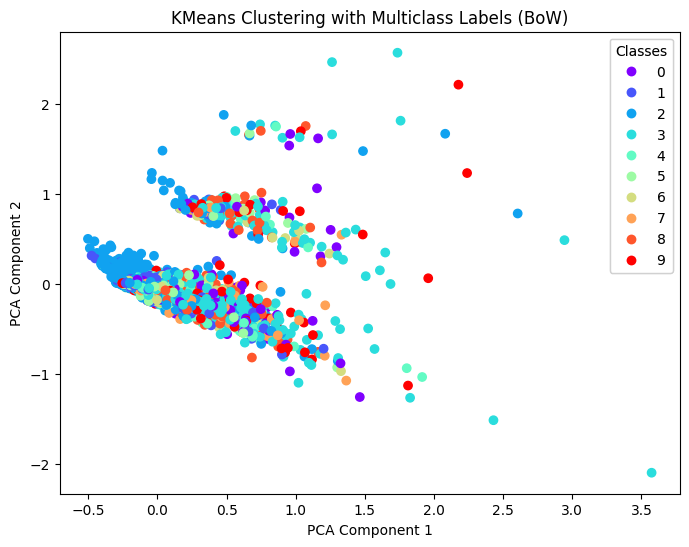

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train_bow.toarray()[:5000])

color_map = {cat: i for i, cat in enumerate(data['category'].unique())}
colors = y_train[:5000].map(color_map)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, cmap='rainbow', label=y_train)
plt.title('KMeans Clustering with Multiclass Labels (BoW)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Optional: Add a legend with class labels
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.show()

## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

In [77]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(x_train_bow, y_train)

/home/joao-correia/anaconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(x_test_bow)
print(f'Predicted values: {y_pred[:5]}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

Predicted values: ['POLITICS' 'WELLNESS' 'POLITICS' 'STYLE & BEAUTY' 'STYLE & BEAUTY']
Accuracy: 0.6184248485431292
Precision: 0.6049924964631361
Recall: 0.6184248485431292
